In [1]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
plt.rcParams['savefig.dpi'] = 600
import scipy.stats as stats
from matplotlib import ticker
import matplotlib.gridspec as gridspec

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1) Importing and compiling KS statistics

In [3]:
data_KS_Bp = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Dist_stats_all_Bp_higher_WGD.csv')

In [4]:
data_KS_Bp = data_KS_Bp[(data_KS_Bp['Mut_sigma'] == 0.025) & (data_KS_Bp['Folder'] == 'Bp_higher_1e6') & (data_KS_Bp['Comparison'] == 'WGD') & (data_KS_Bp['Type'] == 'All')].reset_index(drop=True)

In [5]:
# Keeping only the two models (ignoring the two internal controls)
data_KS_Bp = data_KS_Bp[(data_KS_Bp['Model'] == 'Minimal') | (data_KS_Bp['Model'] == 'Mixed')].reset_index(drop=True)

The models are renamed like in the paper and target size ratios are converted to fractions for the figure

In [6]:
data_KS_Bp = data_KS_Bp.astype({'Mut_ratio': 'string'})

In [7]:
ratio_dict = {'0.1': '1/10', '0.16': '1/6', '0.2': '1/5', '0.25': '1/4', 
              '0.33': '1/3', '0.5': '1/2', '1.0': '1', '2.0': '2', '3.0': '3',
              '4.0': '4', '5.0': '5'}

model_names = {'Mixed': 'Precision-economy', 'Minimal': 'Minimal'}

for row in range(data_KS_Bp.shape[0]):
  data_KS_Bp.at[row, 'Model'] = model_names[data_KS_Bp.at[row, 'Model']]
  data_KS_Bp.at[row, 'Mut_ratio'] = ratio_dict[data_KS_Bp.at[row, 'Mut_ratio']]

Three dataframes (one for each property) with dodge and jitter are prepared

In [8]:
# Adding new coordinates with dodge and jitter
sym_to_num = {'1/10':1, '1/6':2, '1/5':3, '1/4':4, '1/3':5, '1/2':6, '1':7, 
              '2':8, '3':9, '4':10, '5':11}

for row in range(data_KS_Bp.shape[0]):
  data_KS_Bp.at[row, 'num'] = sym_to_num[data_KS_Bp.at[row, 'Mut_ratio']]

# Add dodge
dodge_dict = {'Minimal':0.1875, 'Precision-economy':0.0625}

for row in range(data_KS_Bp.shape[0]):
  data_KS_Bp.at[row, 'num'] = data_KS_Bp.at[row, 'num'] + dodge_dict[data_KS_Bp.at[row, 'Model']]

# Add jitter
def jitter(x):
  return x + np.random.uniform(-0.1, 0.1)

data_KS_Bp['num'] = data_KS_Bp['num'].apply(lambda x: jitter(x))

# Create the four distinct dfs
KS_transcription = data_KS_Bp[data_KS_Bp['Property'] == 'Transcription rate'].copy().reset_index(drop=True)
KS_translation = data_KS_Bp[data_KS_Bp['Property'] == 'Translation rate'].copy().reset_index(drop=True)
KS_prot = data_KS_Bp[data_KS_Bp['Property'] == 'Protein abundance'].copy().reset_index(drop=True)

##2) Importing the final simulated relative divergences (log2-fold changes) for when the mutational target size of translation rate is 10x that of transcription rate

In [9]:
folds_1 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Fold_changes_all_Bm01_iter1.csv')
folds_2 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Fold_changes_all_Bm01_iter2.csv')
folds_3 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Fold_changes_all_Bm01_iter3.csv')

folds_all = pd.concat([folds_1, folds_2, folds_3]).reset_index(drop=True)

In [10]:
folds_all = folds_all[(folds_all['Model'] == 'Mixed') | (folds_all['Model'] == 'Minimal') |(folds_all['Model'] == 'WGD couples')].reset_index(drop=True)
folds_all = folds_all[folds_all['Parameter'] != 'Divergence ratio'].reset_index(drop=True)

The models are renamed and the parameters are replaced with the corresponding variables names:

In [11]:
models_dict = {'Minimal': 'Minimal', 'Mixed': 'Precision-economy', 
               'WGD couples': 'Empirical'}

var_dict = {'Transcription rate': r"$\beta_m$",
            'Translation rate': r"$\beta_p$",
            'Protein abundance': r"$P$"}

for row in range(folds_all.shape[0]):
  folds_all.at[row, 'Model'] = models_dict[folds_all.at[row, 'Model']]
  folds_all.at[row, 'Parameter'] = var_dict[folds_all.at[row, 'Parameter']]

## 3) Repeating the same two importation steps for the simulation data with N = 10^5

### Importing and compiling KS statistics

In [12]:
data_KS_Bp_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Dist_stats_all_Bp_higher_WGD.csv')

In [13]:
data_KS_Bp_1e5 = data_KS_Bp_1e5[(data_KS_Bp_1e5['Mut_sigma'] == 0.075) & (data_KS_Bp_1e5['Folder'] == 'Bp_higher_1e5') & (data_KS_Bp_1e5['Comparison'] == 'WGD') & (data_KS_Bp_1e5['Type'] == 'All')].reset_index(drop=True)

In [14]:
# Keeping only the two models (ignoring the two internal controls)
data_KS_Bp_1e5 = data_KS_Bp_1e5[(data_KS_Bp_1e5['Model'] == 'Minimal') | (data_KS_Bp_1e5['Model'] == 'Mixed')].reset_index(drop=True)

The models are renamed like in the paper and target size ratios are converted to fractions for the figure

In [15]:
data_KS_Bp_1e5 = data_KS_Bp_1e5.astype({'Mut_ratio': 'string'})

In [16]:
ratio_dict = {'0.1': '1/10', '0.16': '1/6', '0.2': '1/5', '0.25': '1/4', 
              '0.33': '1/3', '0.5': '1/2', '1.0': '1', '2.0': '2', '3.0': '3',
              '4.0': '4', '5.0': '5'}

model_names = {'Mixed': 'Precision-economy', 'Minimal': 'Minimal'}

for row in range(data_KS_Bp_1e5.shape[0]):
  data_KS_Bp_1e5.at[row, 'Model'] = model_names[data_KS_Bp_1e5.at[row, 'Model']]
  data_KS_Bp_1e5.at[row, 'Mut_ratio'] = ratio_dict[data_KS_Bp_1e5.at[row, 'Mut_ratio']]

Three dataframes (one for each property) with dodge and jitter are prepared

In [17]:
# Adding new coordinates with dodge and jitter
sym_to_num = {'1/10':1, '1/6':2, '1/5':3, '1/4':4, '1/3':5, '1/2':6, '1':7, 
              '2':8, '3':9, '4':10, '5':11}

for row in range(data_KS_Bp_1e5.shape[0]):
  data_KS_Bp_1e5.at[row, 'num'] = sym_to_num[data_KS_Bp_1e5.at[row, 'Mut_ratio']]

# Add dodge
dodge_dict = {'Minimal':0.1875, 'Precision-economy':0.0625}

for row in range(data_KS_Bp_1e5.shape[0]):
  data_KS_Bp_1e5.at[row, 'num'] = data_KS_Bp_1e5.at[row, 'num'] + dodge_dict[data_KS_Bp_1e5.at[row, 'Model']]

# Add jitter
def jitter(x):
  return x + np.random.uniform(-0.1, 0.1)

data_KS_Bp_1e5['num'] = data_KS_Bp_1e5['num'].apply(lambda x: jitter(x))

# Create the four distinct dfs
KS_transcription_1e5 = data_KS_Bp_1e5[data_KS_Bp_1e5['Property'] == 'Transcription rate'].copy().reset_index(drop=True)
KS_translation_1e5 = data_KS_Bp_1e5[data_KS_Bp_1e5['Property'] == 'Translation rate'].copy().reset_index(drop=True)
KS_prot_1e5 = data_KS_Bp_1e5[data_KS_Bp_1e5['Property'] == 'Protein abundance'].copy().reset_index(drop=True)

### Importing the final simulated relative divergences (log2-fold changes) for when the mutational target size of translation rate is 10x that of transcription rate

In [18]:
folds_1_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Fold_changes_all_Bm01_iter1_1e5.csv')
folds_2_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Fold_changes_all_Bm01_iter2_1e5.csv')
folds_3_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Sims_Bp_higher/Fold_changes_all_Bm01_iter3_1e5.csv')

folds_all_1e5 = pd.concat([folds_1_1e5, folds_2_1e5, folds_3_1e5]).reset_index(drop=True)

In [19]:
folds_all_1e5 = folds_all_1e5[(folds_all_1e5['Model'] == 'Mixed') | (folds_all_1e5['Model'] == 'Minimal') |(folds_all_1e5['Model'] == 'WGD couples')].reset_index(drop=True)
folds_all_1e5 = folds_all_1e5[folds_all_1e5['Parameter'] != 'Divergence ratio'].reset_index(drop=True)

The models are renamed and the parameters are replaced with the corresponding variables names:

In [20]:
for row in range(folds_all_1e5.shape[0]):
  folds_all_1e5.at[row, 'Model'] = models_dict[folds_all_1e5.at[row, 'Model']]
  folds_all_1e5.at[row, 'Parameter'] = var_dict[folds_all_1e5.at[row, 'Parameter']]

##3) Construction of the figure

In [21]:
# A function is defined to plot data with markers and colors for hue-levels
# without using seaborn

def hue_scatter(x, y, data, hue, palette, hue_order, markers, ax, size=None, 
                facecolors=None, alpha=None, linewidths=None):
  # Loop through hue orders and plot the points
  for level in hue_order:
    subset = data[data[hue] == level].copy().reset_index(drop=True)

    if facecolors == 'none':
      ax.scatter(subset[x], subset[y], s=size,
                 marker=markers[level], alpha=alpha, linewidths=linewidths,
                 label=level, facecolors=facecolors, edgecolors=palette[level])
      
    else:
      ax.scatter(subset[x], subset[y], s=size, c=palette[level],
                 marker=markers[level], alpha=alpha, linewidths=linewidths,
                 label=level, facecolors=facecolors)

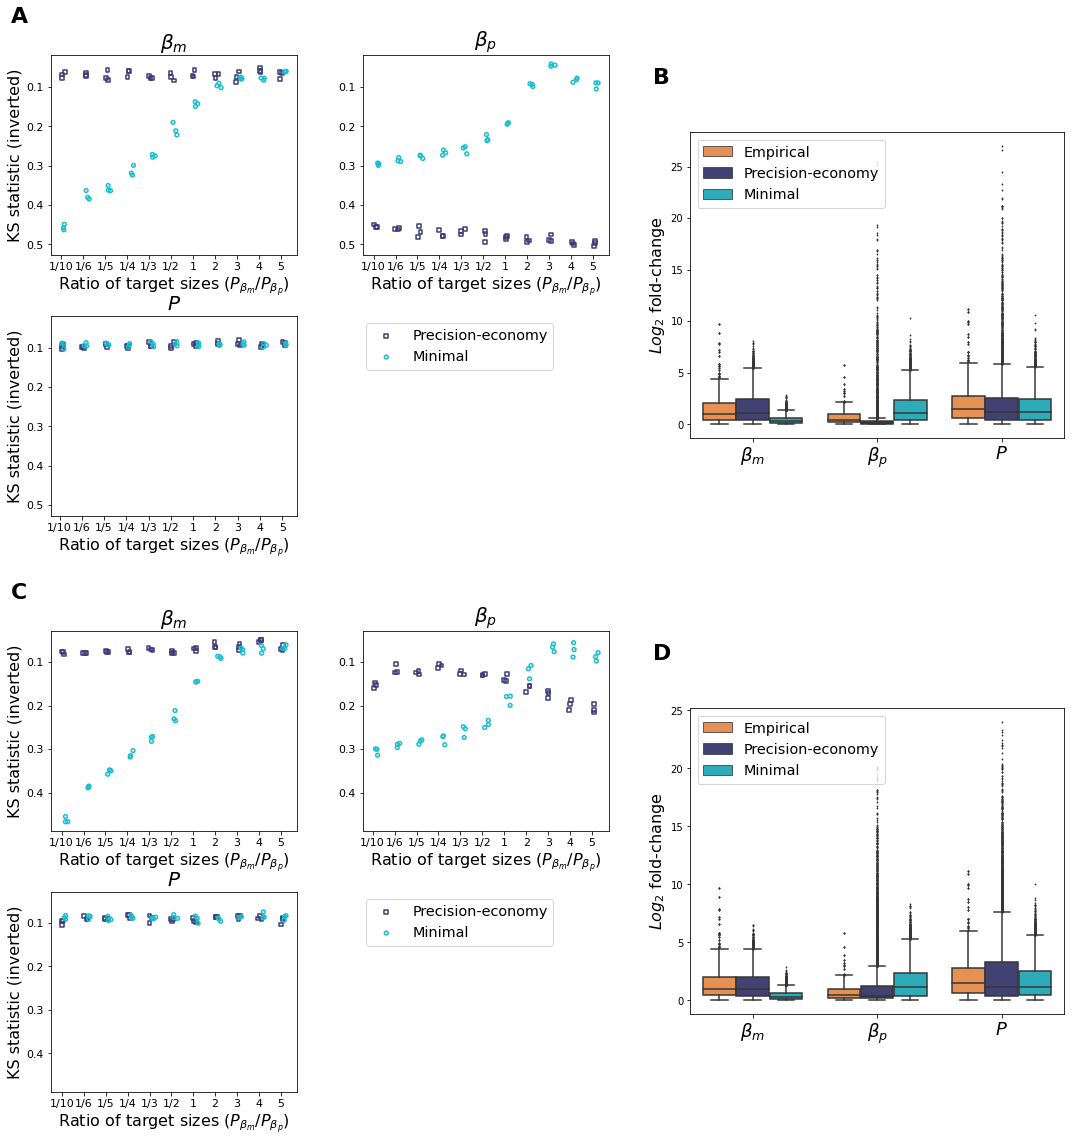

In [22]:
fig = plt.figure(constrained_layout=False, figsize=(16, 16))

# Preparation of the grids
gs1 = fig.add_gridspec(nrows=9, ncols=9, left=0.05, right=0.535, bottom=0.55, 
                       top=0.95, wspace=0.05)
ax1 = fig.add_subplot(gs1[0:4, 0:4])
ax2 = fig.add_subplot(gs1[0:4, 5:9], sharey=ax1)
ax3 = fig.add_subplot(gs1[5:9, 0:4])

gs2 = fig.add_gridspec(nrows=18, ncols=18, left=0.585, right=0.95, bottom=0.55, 
                       top=0.95, wspace=0.05)
ax5 = fig.add_subplot(gs2[3:15, 1:17])

gs3 = fig.add_gridspec(nrows=9, ncols=9, left=0.05, right=0.535, bottom=0.05, 
                       top=0.45, wspace=0.05)
ax6 = fig.add_subplot(gs3[0:4, 0:4])
ax7 = fig.add_subplot(gs3[0:4, 5:9], sharey=ax6)
ax8 = fig.add_subplot(gs3[5:9, 0:4])

gs4 = fig.add_gridspec(nrows=18, ncols=18, left=0.585, right=0.95, bottom=0.05, 
                       top=0.45, wspace=0.05)
ax9 = fig.add_subplot(gs4[3:15, 1:17])

# Parameters for the scatterplots
labels = ['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3', '4', '5']

size = 14

palette = {'Precision-economy': cm.tab20b.colors[0],
           'Minimal': cm.tab10.colors[9]}
hue_order = ['Precision-economy', 'Minimal']
markers = {'Precision-economy': 's', 'Minimal':'o'}

facecolors = 'none'

linewidths = 1.5

# The top part (N = 10^6) is first generated

# First scatterplot
scatter1 = hue_scatter('num', 'KS_stat', KS_transcription, 'Model', palette, 
                       hue_order, markers, ax1, size=size, 
                       facecolors=facecolors, linewidths=linewidths)

plt.sca(ax1) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax1.set_xticklabels(['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3',
                     '4', '5'])
plt.gca().invert_yaxis() # Invert y-axis for KS stats


# Second scatterplot
scatter2 = hue_scatter('num', 'KS_stat', KS_translation, 'Model', palette, 
                       hue_order, markers, ax2, size=size, 
                       facecolors=facecolors, linewidths=linewidths)

plt.sca(ax2) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax2.set_xticklabels(['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3',
                     '4', '5'])


# Third scatterplot
scatter3 = hue_scatter('num', 'KS_stat', KS_prot, 'Model', palette, 
                       hue_order, markers, ax3, size=size, 
                       facecolors=facecolors, linewidths=linewidths)

plt.sca(ax3) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax3.set_xticklabels(['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3',
                     '4', '5'])
plt.gca().invert_yaxis() # Invert y-axis for KS stats

ax3.legend(loc='upper left', bbox_to_anchor=(1.25, 1), fontsize='x-large')

ax3.set_ylim(ax1.get_ylim())

# box plot
pal_violin = {'Precision-economy': cm.tab20b.colors[0], 
              'Minimal': cm.tab10.colors[9], 'Empirical': cm.tab20c.colors[5]}
hue_order_emp = ['Empirical', 'Precision-economy', 'Minimal']

sns.boxplot(x='Parameter', y='Log2 fold-change', data=folds_all,
               hue='Model', palette=pal_violin, hue_order=hue_order_emp,
               ax=ax5, fliersize=1)

ax5.legend(fontsize='x-large')

# Axis labels and titles
ax1.set_ylabel('KS statistic (inverted)', fontsize=16)

for ax in [ax1, ax2, ax3]:
  ax.set_xlabel(r"Ratio of target sizes ($P_{\beta_m}$/$P_{\beta_p}$)", 
                fontsize=16)

ax3.set_ylabel('KS statistic (inverted)', fontsize=16)

ax5.set_xlabel('')
ax5.set_ylabel(r"$Log_2$ fold-change", fontsize=16)

ax1.set_title(r"$\beta_m$", fontsize=20, fontweight="bold")
ax2.set_title(r"$\beta_p$", fontsize=20, fontweight="bold")
ax3.set_title(r"$P$", fontsize=20, fontweight="bold")

# Set the size of all tick labels
for ax in [ax1, ax2, ax3]:
  ax.tick_params(labelsize=11)

ax5.tick_params(axis='x', labelsize=18)

# Annotations
ax1.annotate('A', (-0.16, 1.16), xycoords='axes fraction',
             fontsize=22, fontweight="bold", annotation_clip=False)

ax5.annotate('B', (-0.1, 1.16), xycoords='axes fraction',
             fontsize=22, fontweight="bold", annotation_clip=False)

# Then, the bottom part (N = 10^5) is drawn

# First scatterplot
scatter4 = hue_scatter('num', 'KS_stat', KS_transcription_1e5, 'Model', palette, 
                       hue_order, markers, ax6, size=size, 
                       facecolors=facecolors, linewidths=linewidths)

plt.sca(ax6) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax6.set_xticklabels(['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3',
                     '4', '5'])
plt.gca().invert_yaxis() # Invert y-axis for KS stats


# Second scatterplot
scatter5 = hue_scatter('num', 'KS_stat', KS_translation_1e5, 'Model', palette, 
                       hue_order, markers, ax7, size=size, 
                       facecolors=facecolors, linewidths=linewidths)

plt.sca(ax7) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax7.set_xticklabels(['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3',
                     '4', '5'])


# Third scatterplot
scatter6 = hue_scatter('num', 'KS_stat', KS_prot_1e5, 'Model', palette, 
                       hue_order, markers, ax8, size=size, 
                       facecolors=facecolors, linewidths=linewidths)

plt.sca(ax8) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax8.set_xticklabels(['1/10', '1/6', '1/5', '1/4', '1/3', '1/2', '1', '2', '3',
                     '4', '5'])
plt.gca().invert_yaxis() # Invert y-axis for KS stats

ax8.legend(loc='upper left', bbox_to_anchor=(1.25, 1), fontsize='x-large')

ax8.set_ylim(ax6.get_ylim())

# box plot
sns.boxplot(x='Parameter', y='Log2 fold-change', data=folds_all_1e5,
               hue='Model', palette=pal_violin, hue_order=hue_order_emp,
               ax=ax9, fliersize=1)

ax9.legend(fontsize='x-large')

# Axis labels and titles
ax6.set_ylabel('KS statistic (inverted)', fontsize=16)

for ax in [ax6, ax7, ax8]:
  ax.set_xlabel(r"Ratio of target sizes ($P_{\beta_m}$/$P_{\beta_p}$)", 
                fontsize=16)

ax8.set_ylabel('KS statistic (inverted)', fontsize=16)

ax9.set_xlabel('')
ax9.set_ylabel(r"$Log_2$ fold-change", fontsize=16)

ax6.set_title(r"$\beta_m$", fontsize=20, fontweight="bold")
ax7.set_title(r"$\beta_p$", fontsize=20, fontweight="bold")
ax8.set_title(r"$P$", fontsize=20, fontweight="bold")

# Set the size of all tick labels
for ax in [ax6, ax7, ax8]:
  ax.tick_params(labelsize=11)

ax9.tick_params(axis='x', labelsize=18)

# Annotations
ax6.annotate('C', (-0.16, 1.16), xycoords='axes fraction',
             fontsize=22, fontweight="bold", annotation_clip=False)

ax9.annotate('D', (-0.1, 1.16), xycoords='axes fraction',
             fontsize=22, fontweight="bold", annotation_clip=False)

Fig_S8 = plt.gcf()
Fig_S8.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/FigS8.tiff', bbox_inches='tight')